In [18]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [0]:
import os

os.chdir('/content/drive/My Drive/open_ai/plant-village')

In [0]:
Downloading data to google drive

In [0]:
!git clone https://github.com/spMohanty/PlantVillage-Dataset

Cloning into 'PlantVillage-Dataset'...
remote: Enumerating objects: 163229, done.
remote: Total 163229 (delta 0), reused 0 (delta 0), pack-reused 163229
Receiving objects: 100% (163229/163229), 2.00 GiB | 11.88 MiB/s, done.
Resolving deltas: 100% (99/99), done.
Checking out files: 100% (182401/182401), done.


In [0]:
from fastai import *
from fastai.vision import *
from fastai.metrics import error_rate

Restructuring data to test, valid, train folders

In [0]:
path = 'PlantVillage-Dataset/raw/color'

data_path = 'data'
os.mkdir(data_path)

train_path = os.path.join(data_path, 'train')
os.mkdir(train_path)

valid_path = os.path.join(data_path, 'valid')
os.mkdir(valid_path)

test_path = os.path.join(data_path, 'test')
os.mkdir(test_path)

test_pct = 0.2
valid_pct = 0.2

labels = os.listdir(path)
for label in labels:
  os.mkdir( os.path.join(train_path, label) )
  os.mkdir( os.path.join(valid_path, label) )
  os.mkdir( os.path.join(test_path, label) )

In [0]:
import shutil
import random

for label in labels:
  num_files_label = len( os.listdir( os.path.join(path, label) ) )
  num_test_files = int( num_files_label * test_pct )
  num_valid_files = int( num_files_label * valid_pct )
  
  label_src_dir = os.path.join(path, label)
  fnames = os.listdir(label_src_dir)
  random.shuffle(fnames)
  
  for fname in fnames[:num_test_files]:
    src_path = os.path.join(label_src_dir, fname)
    dest_path = os.path.join(test_path, label, fname)
    shutil.move(src_path, dest_path)
    
  for fname in fnames[num_test_files: num_test_files+num_valid_files]:
    src_path = os.path.join(label_src_dir, fname)
    dest_path = os.path.join(valid_path, label, fname)
    shutil.move(src_path, dest_path)
    
  for fname in fnames[num_test_files+num_valid_files: ]:
    src_path = os.path.join(label_src_dir, fname)
    dest_path = os.path.join(train_path, label, fname)
    shutil.move(src_path, dest_path)

In [0]:
bs = 64

In [58]:
data = ImageDataBunch.from_folder(path=data_path, train='train', valid='valid', 
                                  test='test', size=224, 
                                  bs=bs)

data.normalize(imagenet_stats)

ImageDataBunch;

Train: LabelList (32607 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: data;

Valid: LabelList (10849 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: CategoryList
Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab,Apple___Apple_scab
Path: data;

Test: LabelList (10849 items)
x: ImageItemList
Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224),Image (3, 224, 224)
y: EmptyLabelList
,,,,
Path: data

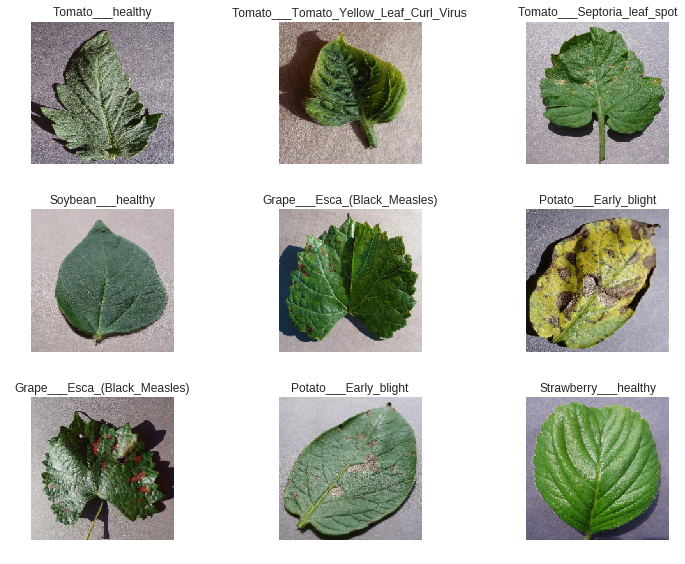

In [59]:
data.show_batch(rows=3, figsize=(10, 8))

In [60]:
print(data.classes)
len(data.classes),data.c

['Apple___Apple_scab', 'Apple___Black_rot', 'Apple___Cedar_apple_rust', 'Apple___healthy', 'Blueberry___healthy', 'Cherry_(including_sour)___Powdery_mildew', 'Cherry_(including_sour)___healthy', 'Corn_(maize)___Cercospora_leaf_spot Gray_leaf_spot', 'Corn_(maize)___Common_rust_', 'Corn_(maize)___Northern_Leaf_Blight', 'Corn_(maize)___healthy', 'Grape___Black_rot', 'Grape___Esca_(Black_Measles)', 'Grape___Leaf_blight_(Isariopsis_Leaf_Spot)', 'Grape___healthy', 'Orange___Haunglongbing_(Citrus_greening)', 'Peach___Bacterial_spot', 'Peach___healthy', 'Pepper,_bell___Bacterial_spot', 'Pepper,_bell___healthy', 'Potato___Early_blight', 'Potato___Late_blight', 'Potato___healthy', 'Raspberry___healthy', 'Soybean___healthy', 'Squash___Powdery_mildew', 'Strawberry___Leaf_scorch', 'Strawberry___healthy', 'Tomato___Bacterial_spot', 'Tomato___Early_blight', 'Tomato___Late_blight', 'Tomato___Leaf_Mold', 'Tomato___Septoria_leaf_spot', 'Tomato___Spider_mites Two-spotted_spider_mite', 'Tomato___Target_Sp

(38, 38)

In [0]:
learn = create_cnn(data, models.resnet34, metrics=error_rate)

In [62]:
learn.fit_one_cycle(5)

epoch,train_loss,valid_loss,error_rate
1,0.318742,0.165908,0.051618
2,0.147458,0.088898,0.030418
3,0.093177,0.057323,0.020094
4,0.045659,0.045744,0.015946
5,0.032639,0.042277,0.014656


In [0]:
learn.save('resnet34-5cycles-no_finetuning-raw-colored-no_transforms')

In [0]:
interp = ClassificationInterpretation.from_learner(learn)

losses, idxs = interp.top_losses()

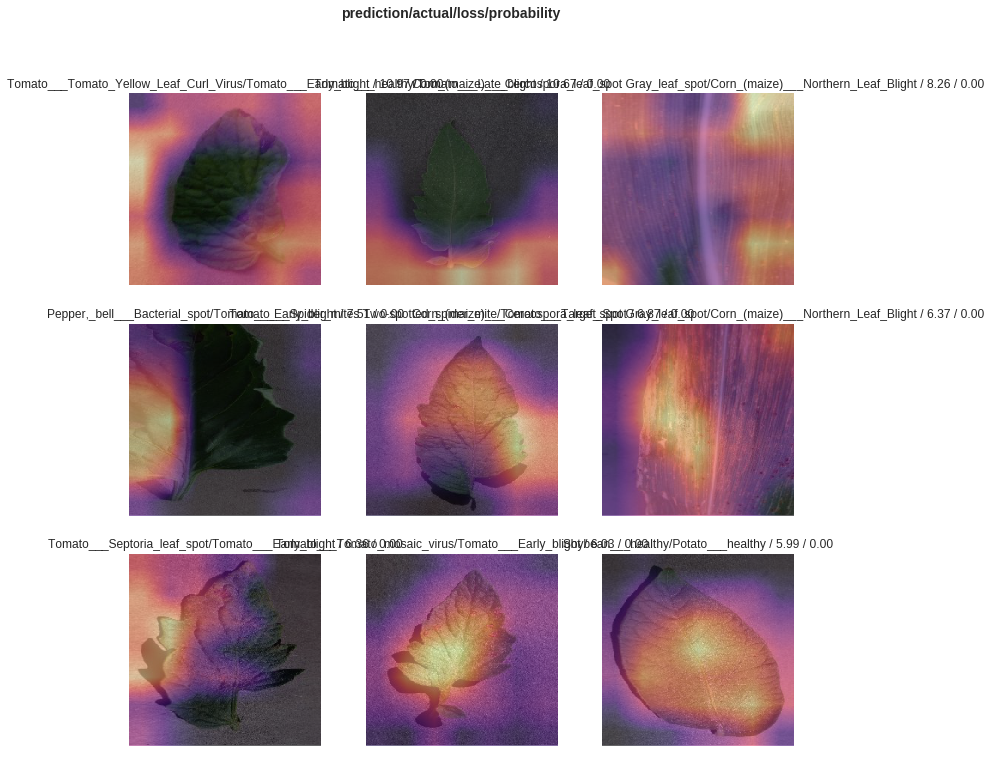

In [65]:
interp.plot_top_losses(9)